In [1]:
# Import libraries
import requests
import pandas as pd
from sklearn.model_selection import train_test_split

# To supress warnings
import sys, os
stdout = sys.stdout
sys.stderr = open(os.devnull, 'w')
import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)

# Tensorflow libraries
import tensorflow as tf
from tensorboard import notebook
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K

from plot_keras_history import plot_history
import matplotlib.pyplot as plt

In [2]:
import shutil
if os.path.isdir('logs'):  
    shutil.rmtree('logs')

# Dataset

[Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) has this attributes:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica
  
More information in [iris.names](https://github.com/jbrownlee/Datasets/blob/master/iris.names)

In [3]:
# Load dataset
dataset = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])  
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Describe dataset
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Separate inputs and ouputs
X = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y_text = dataset[['class']]
Y_text.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [6]:
# One-Hot-Encoding
Y = pd.get_dummies(Y_text, prefix='Class')
Y.head()

,Class_Iris-setosa,Class_Iris-versicolor,Class_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Basic Model

In [8]:
# Create model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Save logs and tensorboard
logdir = os.path.join("logs", "iris_basic")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [11]:
# Train model
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/300
4/4 [==============================] - 1s 118ms/step - loss: 0.9067 - accuracy: 0.6287 - val_loss: 0.8060 - val_accuracy: 0.7000
Epoch 2/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7848 - accuracy: 0.7006 - val_loss: 0.7752 - val_accuracy: 0.7000
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7816 - accuracy: 0.6819 - val_loss: 0.7481 - val_accuracy: 0.7000
Epoch 4/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8087 - accuracy: 0.6360 - val_loss: 0.7257 - val_accuracy: 0.7000
Epoch 5/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7717 - accuracy: 0.6371 - val_loss: 0.7076 - val_accuracy: 0.7000
Epoch 6/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7383 - accuracy: 0.6569 - val_loss: 0.6924 - val_accuracy: 0.7000
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7688 - accuracy: 0.6142 - val_loss: 0.6783 - val_accuracy: 0.7000
Epoch 8/300
4/4 [==

4/4 [==============================] - 0s 10ms/step - loss: 0.5033 - accuracy: 0.8296 - val_loss: 0.4479 - val_accuracy: 0.9200
Epoch 60/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5151 - accuracy: 0.8338 - val_loss: 0.4467 - val_accuracy: 0.9200
Epoch 61/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5128 - accuracy: 0.8737 - val_loss: 0.4440 - val_accuracy: 0.9200
Epoch 62/300
4/4 [==============================] - 0s 11ms/step - loss: 0.4965 - accuracy: 0.8645 - val_loss: 0.4412 - val_accuracy: 0.9200
Epoch 63/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4936 - accuracy: 0.8555 - val_loss: 0.4387 - val_accuracy: 0.9200
Epoch 64/300
4/4 [==============================] - 0s 11ms/step - loss: 0.4800 - accuracy: 0.8763 - val_loss: 0.4363 - val_accuracy: 0.9000
Epoch 65/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4830 - accuracy: 0.8648 - val_loss: 0.4343 - val_accuracy: 0.9200
Epoch 66/300
4/4 [========

4/4 [==============================] - 0s 10ms/step - loss: 0.4133 - accuracy: 0.9538 - val_loss: 0.3493 - val_accuracy: 0.9800
Epoch 118/300
4/4 [==============================] - 0s 9ms/step - loss: 0.4056 - accuracy: 0.9632 - val_loss: 0.3484 - val_accuracy: 1.0000
Epoch 119/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3849 - accuracy: 0.9600 - val_loss: 0.3474 - val_accuracy: 1.0000
Epoch 120/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4105 - accuracy: 0.9621 - val_loss: 0.3458 - val_accuracy: 1.0000
Epoch 121/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3854 - accuracy: 0.9632 - val_loss: 0.3439 - val_accuracy: 1.0000
Epoch 122/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3860 - accuracy: 0.9569 - val_loss: 0.3420 - val_accuracy: 0.9800
Epoch 123/300
4/4 [==============================] - 0s 11ms/step - loss: 0.4047 - accuracy: 0.9475 - val_loss: 0.3406 - val_accuracy: 0.9800
Epoch 124/300
4/4 [==

Epoch 175/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3234 - accuracy: 0.9786 - val_loss: 0.2814 - val_accuracy: 1.0000
Epoch 176/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3236 - accuracy: 0.9693 - val_loss: 0.2793 - val_accuracy: 1.0000
Epoch 177/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3250 - accuracy: 0.9652 - val_loss: 0.2776 - val_accuracy: 1.0000
Epoch 178/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3136 - accuracy: 0.9538 - val_loss: 0.2768 - val_accuracy: 1.0000
Epoch 179/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3304 - accuracy: 0.9600 - val_loss: 0.2760 - val_accuracy: 1.0000
Epoch 180/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3214 - accuracy: 0.9507 - val_loss: 0.2751 - val_accuracy: 1.0000
Epoch 181/300
4/4 [==============================] - 0s 14ms/step - loss: 0.3052 - accuracy: 0.9694 - val_loss: 0.2737 - val_accuracy: 1.0000
Epoch 

4/4 [==============================] - 0s 10ms/step - loss: 0.2728 - accuracy: 0.9446 - val_loss: 0.2270 - val_accuracy: 1.0000
Epoch 233/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2654 - accuracy: 0.9446 - val_loss: 0.2264 - val_accuracy: 1.0000
Epoch 234/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2736 - accuracy: 0.9446 - val_loss: 0.2255 - val_accuracy: 1.0000
Epoch 235/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2634 - accuracy: 0.9540 - val_loss: 0.2245 - val_accuracy: 1.0000
Epoch 236/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2624 - accuracy: 0.9665 - val_loss: 0.2239 - val_accuracy: 1.0000
Epoch 237/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2702 - accuracy: 0.9477 - val_loss: 0.2231 - val_accuracy: 1.0000
Epoch 238/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2608 - accuracy: 0.9383 - val_loss: 0.2225 - val_accuracy: 1.0000
Epoch 239/300
4/4 [=

Epoch 290/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2150 - accuracy: 0.9632 - val_loss: 0.1869 - val_accuracy: 1.0000
Epoch 291/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2195 - accuracy: 0.9600 - val_loss: 0.1863 - val_accuracy: 1.0000
Epoch 292/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2225 - accuracy: 0.9694 - val_loss: 0.1862 - val_accuracy: 1.0000
Epoch 293/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2316 - accuracy: 0.9538 - val_loss: 0.1868 - val_accuracy: 1.0000
Epoch 294/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2115 - accuracy: 0.9755 - val_loss: 0.1876 - val_accuracy: 1.0000
Epoch 295/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2189 - accuracy: 0.9847 - val_loss: 0.1870 - val_accuracy: 1.0000
Epoch 296/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2222 - accuracy: 0.9753 - val_loss: 0.1872 - val_accuracy: 1.0000
Epoch 

# Model with more metrics

In [12]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
# Create model
model_metrics = Sequential()
model_metrics.add(Dense(8, input_dim=4, activation='relu'))
model_metrics.add(Dense(3, activation='softmax'))
# Compile model
model_metrics.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
# Save logs and tensorboard
logdir_metrics = os.path.join("logs", "iris_metrics")
tensorboard_callback_metrics = tf.keras.callbacks.TensorBoard(logdir_metrics, histogram_freq=1)
# Train model
history_metrics = model_metrics.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[tensorboard_callback_metrics])

Epoch 1/300
4/4 [==============================] - 1s 92ms/step - loss: 3.1917 - accuracy: 0.3089 - f1_m: 0.3229 - precision_m: 0.3229 - recall_m: 0.3229 - val_loss: 3.1275 - val_accuracy: 0.3200 - val_f1_m: 0.3108 - val_precision_m: 0.3108 - val_recall_m: 0.3108
Epoch 2/300
4/4 [==============================] - 0s 11ms/step - loss: 2.9358 - accuracy: 0.3548 - f1_m: 0.3469 - precision_m: 0.3469 - recall_m: 0.3469 - val_loss: 3.0340 - val_accuracy: 0.3200 - val_f1_m: 0.3108 - val_precision_m: 0.3108 - val_recall_m: 0.3108
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 2.8360 - accuracy: 0.3506 - f1_m: 0.3865 - precision_m: 0.3865 - recall_m: 0.3865 - val_loss: 2.9446 - val_accuracy: 0.3200 - val_f1_m: 0.3108 - val_precision_m: 0.3108 - val_recall_m: 0.3108
Epoch 4/300
4/4 [==============================] - 0s 12ms/step - loss: 2.7835 - accuracy: 0.3423 - f1_m: 0.4000 - precision_m: 0.4000 - recall_m: 0.4000 - val_loss: 2.8624 - val_accuracy: 0.3200 - val_f1_m: 

Epoch 32/300
4/4 [==============================] - 0s 10ms/step - loss: 1.3611 - accuracy: 0.3610 - f1_m: 0.3531 - precision_m: 0.3531 - recall_m: 0.3531 - val_loss: 1.4513 - val_accuracy: 0.3200 - val_f1_m: 0.3108 - val_precision_m: 0.3108 - val_recall_m: 0.3108
Epoch 33/300
4/4 [==============================] - 0s 11ms/step - loss: 1.3899 - accuracy: 0.3402 - f1_m: 0.3542 - precision_m: 0.3542 - recall_m: 0.3542 - val_loss: 1.4294 - val_accuracy: 0.3200 - val_f1_m: 0.3108 - val_precision_m: 0.3108 - val_recall_m: 0.3108
Epoch 34/300
4/4 [==============================] - 0s 11ms/step - loss: 1.3576 - accuracy: 0.3464 - f1_m: 0.3604 - precision_m: 0.3604 - recall_m: 0.3604 - val_loss: 1.4098 - val_accuracy: 0.3200 - val_f1_m: 0.3108 - val_precision_m: 0.3108 - val_recall_m: 0.3108
Epoch 35/300
4/4 [==============================] - 0s 12ms/step - loss: 1.3343 - accuracy: 0.3527 - f1_m: 0.3667 - precision_m: 0.3667 - recall_m: 0.3667 - val_loss: 1.3921 - val_accuracy: 0.3200 - val_f1

Epoch 63/300
4/4 [==============================] - 0s 11ms/step - loss: 1.1158 - accuracy: 0.3600 - f1_m: 0.4568 - precision_m: 0.5598 - recall_m: 0.3906 - val_loss: 1.1609 - val_accuracy: 0.3200 - val_f1_m: 0.3724 - val_precision_m: 0.4664 - val_recall_m: 0.3108
Epoch 64/300
4/4 [==============================] - 0s 11ms/step - loss: 1.1372 - accuracy: 0.3329 - f1_m: 0.3967 - precision_m: 0.5561 - recall_m: 0.3198 - val_loss: 1.1586 - val_accuracy: 0.3200 - val_f1_m: 0.3800 - val_precision_m: 0.4892 - val_recall_m: 0.3108
Epoch 65/300
4/4 [==============================] - 0s 8ms/step - loss: 1.1272 - accuracy: 0.3381 - f1_m: 0.4380 - precision_m: 0.5546 - recall_m: 0.3688 - val_loss: 1.1562 - val_accuracy: 0.3200 - val_f1_m: 0.3840 - val_precision_m: 0.5023 - val_recall_m: 0.3108
Epoch 66/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1457 - accuracy: 0.3173 - f1_m: 0.3909 - precision_m: 0.5625 - recall_m: 0.3010 - val_loss: 1.1540 - val_accuracy: 0.3200 - val_f1_

Epoch 94/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0826 - accuracy: 0.3370 - f1_m: 0.1107 - precision_m: 0.9000 - recall_m: 0.0594 - val_loss: 1.1064 - val_accuracy: 0.3200 - val_f1_m: 0.1383 - val_precision_m: 1.0000 - val_recall_m: 0.0747
Epoch 95/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0669 - accuracy: 0.3558 - f1_m: 0.1362 - precision_m: 0.8333 - recall_m: 0.0771 - val_loss: 1.1052 - val_accuracy: 0.3200 - val_f1_m: 0.1383 - val_precision_m: 1.0000 - val_recall_m: 0.0747
Epoch 96/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0709 - accuracy: 0.3527 - f1_m: 0.0510 - precision_m: 0.4333 - recall_m: 0.0271 - val_loss: 1.1042 - val_accuracy: 0.3200 - val_f1_m: 0.1383 - val_precision_m: 1.0000 - val_recall_m: 0.0747
Epoch 97/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0880 - accuracy: 0.3183 - f1_m: 0.0358 - precision_m: 0.4333 - recall_m: 0.0187 - val_loss: 1.1031 - val_accuracy: 0.3200 - val_f1

Epoch 125/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0609 - accuracy: 0.3214 - f1_m: 0.1364 - precision_m: 1.0000 - recall_m: 0.0760 - val_loss: 1.0692 - val_accuracy: 0.3200 - val_f1_m: 0.1115 - val_precision_m: 1.0000 - val_recall_m: 0.0590
Epoch 126/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0651 - accuracy: 0.2881 - f1_m: 0.1407 - precision_m: 0.8333 - recall_m: 0.0896 - val_loss: 1.0678 - val_accuracy: 0.3200 - val_f1_m: 0.1115 - val_precision_m: 1.0000 - val_recall_m: 0.0590
Epoch 127/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0338 - accuracy: 0.3641 - f1_m: 0.1831 - precision_m: 0.9000 - recall_m: 0.1062 - val_loss: 1.0663 - val_accuracy: 0.3200 - val_f1_m: 0.1115 - val_precision_m: 1.0000 - val_recall_m: 0.0590
Epoch 128/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0602 - accuracy: 0.3110 - f1_m: 0.1633 - precision_m: 1.0000 - recall_m: 0.0917 - val_loss: 1.0649 - val_accuracy: 0.3200 - va

Epoch 156/300
4/4 [==============================] - ETA: 0s - loss: 0.9953 - accuracy: 0.4375 - f1_m: 0.1176 - precision_m: 1.0000 - recall_m: 0.06 - 0s 11ms/step - loss: 1.0128 - accuracy: 0.4008 - f1_m: 0.0907 - precision_m: 0.9000 - recall_m: 0.0479 - val_loss: 1.0281 - val_accuracy: 0.3600 - val_f1_m: 0.0526 - val_precision_m: 0.5000 - val_recall_m: 0.0278
Epoch 157/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0140 - accuracy: 0.4143 - f1_m: 0.0641 - precision_m: 0.9000 - recall_m: 0.0333 - val_loss: 1.0274 - val_accuracy: 0.3600 - val_f1_m: 0.0526 - val_precision_m: 0.5000 - val_recall_m: 0.0278
Epoch 158/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0230 - accuracy: 0.3951 - f1_m: 0.0415 - precision_m: 0.4333 - recall_m: 0.0219 - val_loss: 1.0271 - val_accuracy: 0.3600 - val_f1_m: 0.0526 - val_precision_m: 0.5000 - val_recall_m: 0.0278
Epoch 159/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0086 - accuracy: 0.4531 - f1

4/4 [==============================] - 0s 11ms/step - loss: 0.9664 - accuracy: 0.6171 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.9732 - val_accuracy: 0.5600 - val_f1_m: 0.0526 - val_precision_m: 0.5000 - val_recall_m: 0.0278
Epoch 186/300
4/4 [==============================] - 0s 10ms/step - loss: 0.9732 - accuracy: 0.5716 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.9698 - val_accuracy: 0.5800 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 187/300
4/4 [==============================] - 0s 15ms/step - loss: 0.9589 - accuracy: 0.6089 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.9660 - val_accuracy: 0.5800 - val_f1_m: 0.0526 - val_precision_m: 0.5000 - val_recall_m: 0.0278
Epoch 188/300
4/4 [==============================] - 0s 11ms/step - loss: 0.9542 - accuracy: 0.6265 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 

Epoch 215/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8691 - accuracy: 0.6987 - f1_m: 0.0882 - precision_m: 0.9000 - recall_m: 0.0469 - val_loss: 0.8438 - val_accuracy: 0.7400 - val_f1_m: 0.2111 - val_precision_m: 1.0000 - val_recall_m: 0.1181
Epoch 216/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8625 - accuracy: 0.7151 - f1_m: 0.1084 - precision_m: 0.5333 - recall_m: 0.0625 - val_loss: 0.8391 - val_accuracy: 0.7400 - val_f1_m: 0.2540 - val_precision_m: 1.0000 - val_recall_m: 0.1458
Epoch 217/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8553 - accuracy: 0.7036 - f1_m: 0.1202 - precision_m: 0.9000 - recall_m: 0.0646 - val_loss: 0.8351 - val_accuracy: 0.7400 - val_f1_m: 0.2540 - val_precision_m: 1.0000 - val_recall_m: 0.1458
Epoch 218/300
4/4 [==============================] - 0s 11ms/step - loss: 0.8603 - accuracy: 0.7283 - f1_m: 0.1215 - precision_m: 0.9000 - recall_m: 0.0656 - val_loss: 0.8307 - val_accuracy: 0.7600 - va

4/4 [==============================] - 0s 11ms/step - loss: 0.7291 - accuracy: 0.7967 - f1_m: 0.6385 - precision_m: 1.0000 - recall_m: 0.4740 - val_loss: 0.6886 - val_accuracy: 0.7400 - val_f1_m: 0.6802 - val_precision_m: 1.0000 - val_recall_m: 0.5191
Epoch 246/300
4/4 [==============================] - 0s 11ms/step - loss: 0.7294 - accuracy: 0.7635 - f1_m: 0.6497 - precision_m: 1.0000 - recall_m: 0.4969 - val_loss: 0.6837 - val_accuracy: 0.7400 - val_f1_m: 0.6802 - val_precision_m: 1.0000 - val_recall_m: 0.5191
Epoch 247/300
4/4 [==============================] - 0s 11ms/step - loss: 0.7151 - accuracy: 0.7451 - f1_m: 0.6557 - precision_m: 1.0000 - recall_m: 0.4896 - val_loss: 0.6785 - val_accuracy: 0.7400 - val_f1_m: 0.7039 - val_precision_m: 1.0000 - val_recall_m: 0.5503
Epoch 248/300
4/4 [==============================] - 0s 11ms/step - loss: 0.7291 - accuracy: 0.6706 - f1_m: 0.6555 - precision_m: 1.0000 - recall_m: 0.5031 - val_loss: 0.6739 - val_accuracy: 0.7400 - val_f1_m: 0.7151

4/4 [==============================] - 0s 11ms/step - loss: 0.6301 - accuracy: 0.7898 - f1_m: 0.6997 - precision_m: 1.0000 - recall_m: 0.5427 - val_loss: 0.5768 - val_accuracy: 0.8000 - val_f1_m: 0.7407 - val_precision_m: 1.0000 - val_recall_m: 0.5938
Epoch 276/300
4/4 [==============================] - 0s 11ms/step - loss: 0.6457 - accuracy: 0.7658 - f1_m: 0.6535 - precision_m: 1.0000 - recall_m: 0.4958 - val_loss: 0.5731 - val_accuracy: 0.8000 - val_f1_m: 0.7407 - val_precision_m: 1.0000 - val_recall_m: 0.5938
Epoch 277/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6153 - accuracy: 0.8066 - f1_m: 0.6870 - precision_m: 1.0000 - recall_m: 0.5271 - val_loss: 0.5691 - val_accuracy: 0.8000 - val_f1_m: 0.7407 - val_precision_m: 1.0000 - val_recall_m: 0.5938
Epoch 278/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6243 - accuracy: 0.7818 - f1_m: 0.6870 - precision_m: 1.0000 - recall_m: 0.5271 - val_loss: 0.5655 - val_accuracy: 0.8000 - val_f1_m: 0.7407

# Tensorboard

You can open in a terminal by doing:
```tensorboard --logdir logs``` and then display in your navigator or in jupyter notebook

In [14]:
import subprocess
ls_output=subprocess.Popen(["tensorboard", '--logdir=logs'])

In [15]:
notebook.display()

Selecting TensorBoard with logdir logs (started 1:28:24 ago; port 6006, pid 11204).


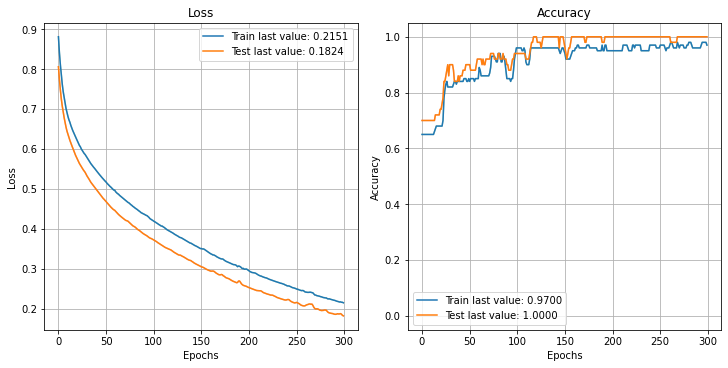

In [16]:
plot_history(history)
plt.show()

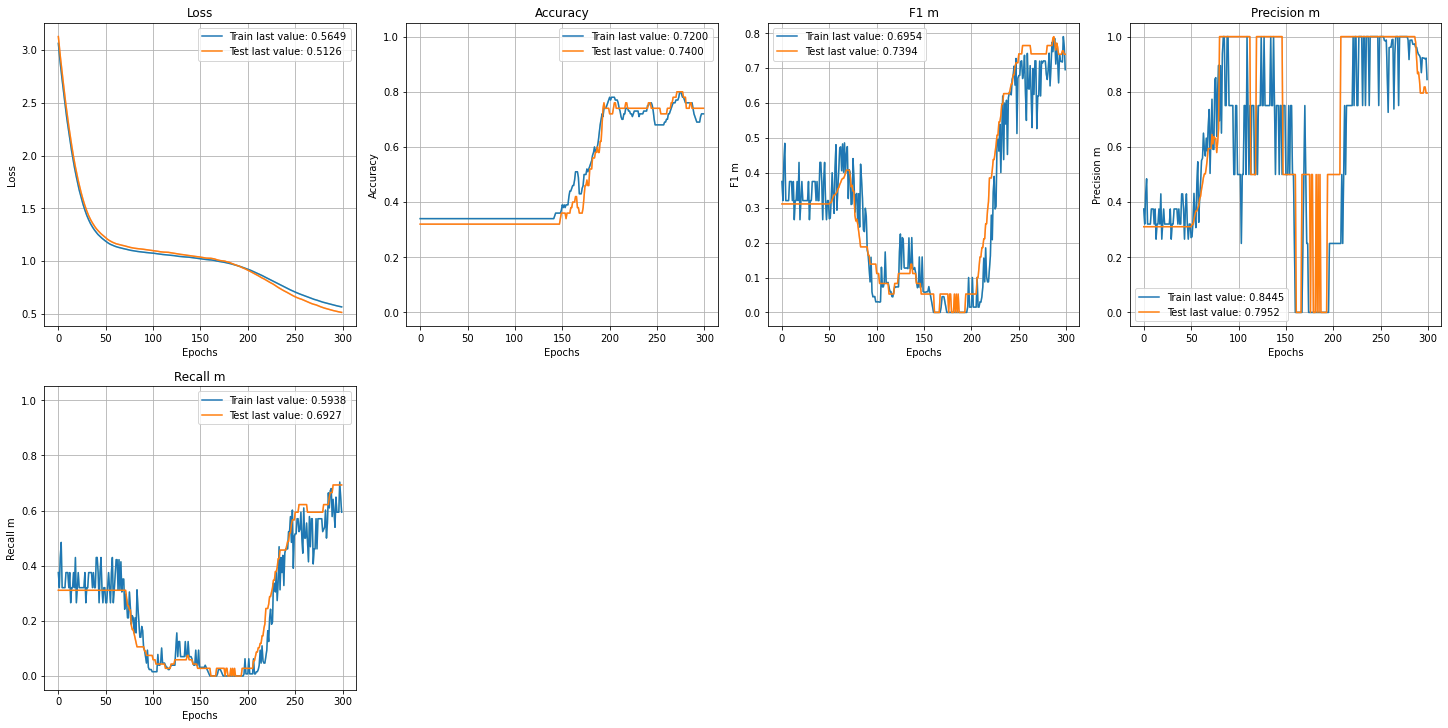

In [17]:
plot_history(history_metrics)
plt.show()

# Display weights

In [18]:
#layer_number = 1
for layer_number, layer in enumerate(model.layers):
    print('\tLayer: '+str(layer_number+1))
    #layer_number += 1
    weights = layer.get_weights()
    for index, weight in enumerate(weights[0]):
        print(str(index+1)+" "+str(weight))
    print("Bias "+str(weights[1]))

	Layer: 1
1 [ 0.44590163 -0.3110719  -0.06622702  0.13144577  0.8020196  -0.46102777
  0.50015455 -0.4787995 ]
2 [ 0.9422038  -0.48188937 -0.14605892  0.42747003 -0.15644622  0.22890538
  0.22611038 -0.6907034 ]
3 [-0.811156   -0.37815332 -0.06878722 -0.2173652   0.2512818   0.96733016
 -0.7284767  -0.30762935]
4 [-0.53993374  0.64757556 -0.4220968   0.54030347 -0.15829353  0.7615029
 -0.8089997  -0.44565403]
Bias [ 0.4088276   0.          0.         -0.17574778  0.26214454 -0.20217475
  0.2324573   0.        ]
	Layer: 2
1 [ 0.57404035  0.23562087 -0.98688954]
2 [0.36076134 0.10204071 0.06353861]
3 [0.2055667  0.24078614 0.20420384]
4 [0.8472205  0.4324512  0.58957106]
5 [-0.74339825 -0.20138268 -0.5891113 ]
6 [-0.99086505 -0.0802277   0.9864978 ]
7 [ 0.40563062 -1.5527574  -0.5738876 ]
8 [ 0.04240626 -0.46105814  0.40726572]
Bias [ 0.14585413  0.24913284 -0.2830338 ]


# More complex model

In [19]:
# Create model
model_complex = Sequential()
model_complex.add(Dense(8, input_dim=4, activation='relu'))
model_complex.add(Dense(16, activation='relu'))
model_complex.add(Dense(8, activation='relu'))
model_complex.add(Dense(3, activation='softmax'))
# Compile model
model_complex.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Save logs and tensorboard
logdir_complex = os.path.join("logs", "iris_complex")
tensorboard_callback_complex = tf.keras.callbacks.TensorBoard(logdir_complex, histogram_freq=1)
# Train model
history_complex = model_complex.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test), callbacks=[tensorboard_callback_complex])

Epoch 1/150
4/4 [==============================] - 1s 92ms/step - loss: 2.0092 - accuracy: 0.3527 - val_loss: 2.2298 - val_accuracy: 0.3200
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 1.9079 - accuracy: 0.3537 - val_loss: 2.0505 - val_accuracy: 0.3200
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 1.6033 - accuracy: 0.3850 - val_loss: 1.9071 - val_accuracy: 0.3200
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 1.6668 - accuracy: 0.3329 - val_loss: 1.7958 - val_accuracy: 0.3200
Epoch 5/150
4/4 [==============================] - 0s 11ms/step - loss: 1.6237 - accuracy: 0.3310 - val_loss: 1.6977 - val_accuracy: 0.1400
Epoch 6/150
4/4 [==============================] - 0s 15ms/step - loss: 1.4307 - accuracy: 0.1727 - val_loss: 1.6061 - val_accuracy: 0.0400
Epoch 7/150
4/4 [==============================] - 0s 14ms/step - loss: 1.4278 - accuracy: 0.0903 - val_loss: 1.5250 - val_accuracy: 0.1000
Epoch 8/150
4/4 [===

4/4 [==============================] - 0s 11ms/step - loss: 0.6364 - accuracy: 0.7594 - val_loss: 0.6068 - val_accuracy: 0.8200
Epoch 59/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6452 - accuracy: 0.7811 - val_loss: 0.6008 - val_accuracy: 0.8400
Epoch 60/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6309 - accuracy: 0.7849 - val_loss: 0.5941 - val_accuracy: 0.7000
Epoch 61/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6337 - accuracy: 0.6369 - val_loss: 0.5912 - val_accuracy: 0.7000
Epoch 62/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6247 - accuracy: 0.6444 - val_loss: 0.5871 - val_accuracy: 0.7000
Epoch 63/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6223 - accuracy: 0.6485 - val_loss: 0.5775 - val_accuracy: 0.7000
Epoch 64/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6138 - accuracy: 0.6454 - val_loss: 0.5683 - val_accuracy: 0.7000
Epoch 65/150
4/4 [========

4/4 [==============================] - 0s 10ms/step - loss: 0.4042 - accuracy: 0.9816 - val_loss: 0.3633 - val_accuracy: 1.0000
Epoch 117/150
4/4 [==============================] - 0s 10ms/step - loss: 0.4070 - accuracy: 0.9753 - val_loss: 0.3565 - val_accuracy: 1.0000
Epoch 118/150
4/4 [==============================] - 0s 10ms/step - loss: 0.3846 - accuracy: 0.9724 - val_loss: 0.3505 - val_accuracy: 1.0000
Epoch 119/150
4/4 [==============================] - 0s 10ms/step - loss: 0.3894 - accuracy: 0.9593 - val_loss: 0.3446 - val_accuracy: 0.9800
Epoch 120/150
4/4 [==============================] - 0s 11ms/step - loss: 0.4012 - accuracy: 0.9322 - val_loss: 0.3404 - val_accuracy: 1.0000
Epoch 121/150
4/4 [==============================] - 0s 11ms/step - loss: 0.3840 - accuracy: 0.9385 - val_loss: 0.3388 - val_accuracy: 1.0000
Epoch 122/150
4/4 [==============================] - 0s 11ms/step - loss: 0.3919 - accuracy: 0.9753 - val_loss: 0.3370 - val_accuracy: 1.0000
Epoch 123/150
4/4 [=

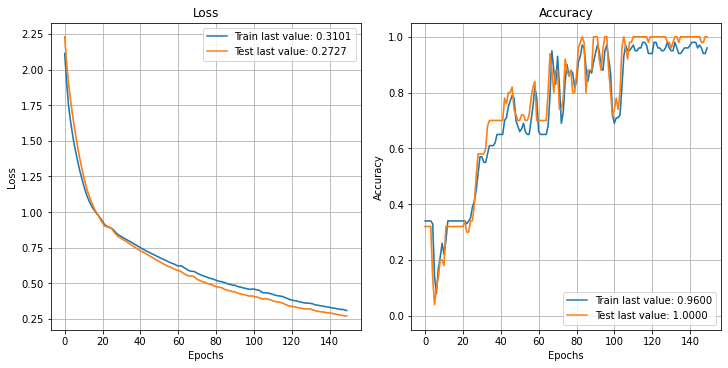

In [20]:
plot_history(history_complex)
plt.show()

# Dropout


In [21]:
# Create model
model_dropout = Sequential()
model_dropout.add(Dense(8, input_dim=4, activation='relu'))
model_dropout.add(Dense(16, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(8, activation='relu'))
model_dropout.add(Dense(3, activation='softmax'))
# Compile model
model_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Save logs and tensorboard
logdir_dropout = os.path.join("logs", "iris_dropout")
tensorboard_callback_dropout= tf.keras.callbacks.TensorBoard(logdir_dropout, histogram_freq=1)
# Train model
history_dropout = model_dropout.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test), callbacks=[tensorboard_callback_dropout])

Epoch 1/150
4/4 [==============================] - 0s 68ms/step - loss: 1.0449 - accuracy: 0.4505 - val_loss: 0.9829 - val_accuracy: 0.7000
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 1.0294 - accuracy: 0.5641 - val_loss: 0.9663 - val_accuracy: 0.7000
Epoch 3/150
4/4 [==============================] - 0s 11ms/step - loss: 1.0059 - accuracy: 0.5591 - val_loss: 0.9472 - val_accuracy: 0.7000
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 0.9632 - accuracy: 0.5882 - val_loss: 0.9230 - val_accuracy: 0.7000
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.9284 - accuracy: 0.5935 - val_loss: 0.9005 - val_accuracy: 0.7000
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.9143 - accuracy: 0.6021 - val_loss: 0.8800 - val_accuracy: 0.7000
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 0.9344 - accuracy: 0.5709 - val_loss: 0.8618 - val_accuracy: 0.7000
Epoch 8/150
4/4 [===

Epoch 59/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6215 - accuracy: 0.6678 - val_loss: 0.4665 - val_accuracy: 0.7000
Epoch 60/150
4/4 [==============================] - 0s 10ms/step - loss: 0.5797 - accuracy: 0.6338 - val_loss: 0.4610 - val_accuracy: 0.7000
Epoch 61/150
4/4 [==============================] - 0s 10ms/step - loss: 0.5677 - accuracy: 0.6696 - val_loss: 0.4552 - val_accuracy: 0.7000
Epoch 62/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6088 - accuracy: 0.6734 - val_loss: 0.4482 - val_accuracy: 0.7000
Epoch 63/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6187 - accuracy: 0.6710 - val_loss: 0.4425 - val_accuracy: 0.7400
Epoch 64/150
4/4 [==============================] - 0s 10ms/step - loss: 0.5950 - accuracy: 0.6949 - val_loss: 0.4403 - val_accuracy: 0.8000
Epoch 65/150
4/4 [==============================] - 0s 10ms/step - loss: 0.5540 - accuracy: 0.8185 - val_loss: 0.4392 - val_accuracy: 0.8200
Epoch 66/150


Epoch 117/150
4/4 [==============================] - 0s 10ms/step - loss: 0.3796 - accuracy: 0.8303 - val_loss: 0.2118 - val_accuracy: 0.9800
Epoch 118/150
4/4 [==============================] - 0s 10ms/step - loss: 0.2510 - accuracy: 0.9355 - val_loss: 0.2113 - val_accuracy: 1.0000
Epoch 119/150
4/4 [==============================] - 0s 10ms/step - loss: 0.3187 - accuracy: 0.8720 - val_loss: 0.2204 - val_accuracy: 0.9200
Epoch 120/150
4/4 [==============================] - 0s 11ms/step - loss: 0.3343 - accuracy: 0.8647 - val_loss: 0.2461 - val_accuracy: 0.9000
Epoch 121/150
4/4 [==============================] - 0s 13ms/step - loss: 0.3246 - accuracy: 0.8711 - val_loss: 0.2260 - val_accuracy: 0.9200
Epoch 122/150
4/4 [==============================] - 0s 10ms/step - loss: 0.3375 - accuracy: 0.9046 - val_loss: 0.1995 - val_accuracy: 1.0000
Epoch 123/150
4/4 [==============================] - 0s 12ms/step - loss: 0.2649 - accuracy: 0.9529 - val_loss: 0.1931 - val_accuracy: 0.9800
Epoch 

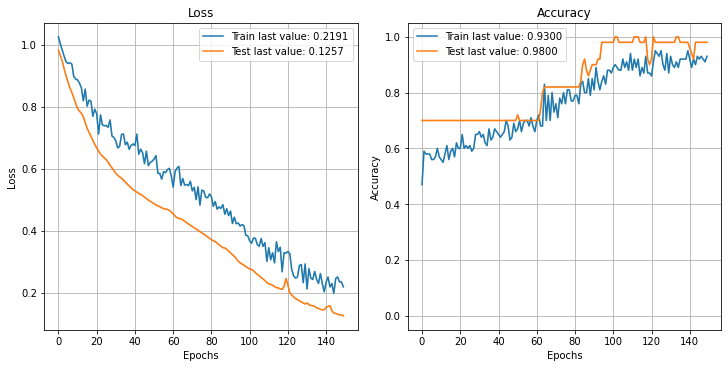

In [22]:
plot_history(history_dropout)
plt.show()